# MNIST Model Creation

The reason I am doing this in a notebook instead of a Python file is because I need to visualize/print data along the way.

In [1]:
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

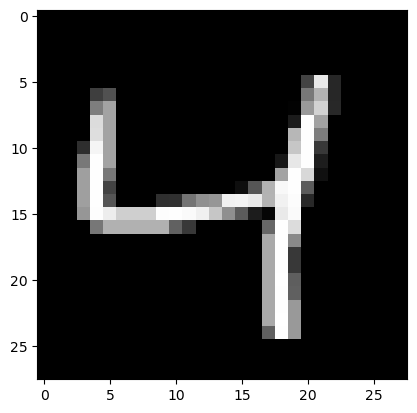

In [4]:
# No need to reshape Xs since we are passing them into the model directly
fig, ax = plt.subplots()
ax.imshow(X_train[2], cmap='gray')
plt.show()

In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(3, 3),
    Conv2D(16, (2, 2), activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(784, input_shape=(784,), activation='sigmoid'),
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 16)          2064      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 144)               0         
                                                                 
 dense (Dense)               (None, 784)               1

In [7]:
history = model.fit(X_train, Y_train, epochs=3, validation_data=(X_test, Y_test))

Epoch 1/3


2023-07-09 23:33:29.758744: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 21s 11ms/step - loss: 0.2507 - accuracy: 0.9222 - val_loss: 0.1215 - val_accuracy: 0.9622
Epoch 2/3
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1039 - accuracy: 0.9679 - val_loss: 0.0772 - val_accuracy: 0.9787
Epoch 3/3
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0866 - accuracy: 0.9730 - val_loss: 0.0890 - val_accuracy: 0.9738


In [8]:
loss, acc = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0890 - accuracy: 0.9738


In [9]:
loss

0.08895132690668106

In [10]:
acc

0.973800003528595

In [11]:
y_true = Y_test
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [12]:
y_true

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [13]:
y_pred = y_pred.argmax(axis=1)

In [14]:
print(classification_report(y_true, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       1.00      0.94      0.97       958
           7       0.94      0.99      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [15]:
# model.save('mnist_cnn.h5')
history

In [17]:
history.history

{'loss': [0.2506522238254547, 0.10387612879276276, 0.0865950956940651],
 'accuracy': [0.9222333431243896, 0.9679166674613953, 0.9729999899864197],
 'val_loss': [0.1215335950255394, 0.0772475004196167, 0.08895132690668106],
 'val_accuracy': [0.9621999859809875, 0.9786999821662903, 0.973800003528595]}

In [18]:
history

In [20]:
history.history['loss']

[0.2506522238254547, 0.10387612879276276, 0.0865950956940651]

In [21]:
model.save('mnist_cnn.h5')

In [22]:
np.save('mnist_cnn_history.npy', history.history)

In [23]:
test = np.load('mnist_cnn_history.npy', allow_pickle=True)

In [24]:
test

array({'loss': [0.2506522238254547, 0.10387612879276276, 0.0865950956940651], 'accuracy': [0.9222333431243896, 0.9679166674613953, 0.9729999899864197], 'val_loss': [0.1215335950255394, 0.0772475004196167, 0.08895132690668106], 'val_accuracy': [0.9621999859809875, 0.9786999821662903, 0.973800003528595]},
      dtype=object)

In [25]:
# https://stackoverflow.com/questions/41061457/keras-how-to-save-the-training-history-attribute-of-the-history-object